<a href="https://colab.research.google.com/github/GabrielPeicher/Trabalhos-Faculdade/blob/main/Alturas_Pais_X_Filhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coletas de Dados**

In [ ]:
# Importação de bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

# Bibliotecas para regressão linear
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Ler o arquivo csv \ correcão do separador
df = pd.read_csv('alturas.csv', sep=';')
df.shape

(1078, 2)

In [ ]:
# Le as primeiras 5 linhas do código
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [ ]:
# Le as ultiimas 5 linhas do código
df.tail()

,Father,Son
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3
1077,70.3,67.0


# **Limpeza e preparação dos dados**


In [ ]:
# Renomear
df.rename(columns = {'Father' : 'Pai', 'Son' : 'Filho'}, inplace = True)

In [ ]:
# Verificando as mudanças
df.columns

Index(['Pai', 'Filho'], dtype='object')

In [ ]:
# Verificando os valores nulos
df['Pai'].isnull().sum()
df['Filho'].isnull().sum()

np.int64(4)

In [ ]:
# Calculando a mediana
mediana_pai = sts.median(df['Pai'])
mediana_filho = sts.median(df['Filho'])

In [ ]:
# Tratamento dos nulos
df.fillna({
    'Pai':mediana_pai,
    'Filho':mediana_filho
}, inplace = True)

df['Pai'].isnull().sum()
df['Filho'].isnull().sum()

np.int64(0)


**Verificação de outliers (boxplot)**



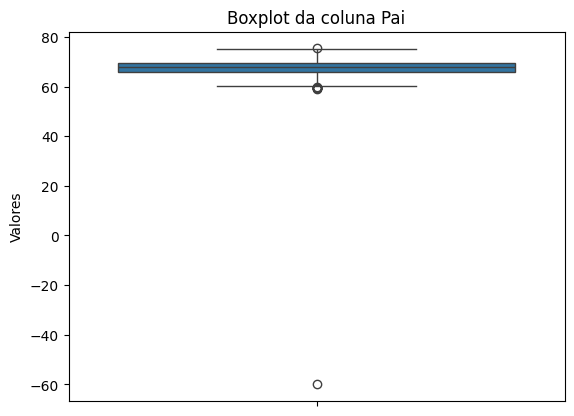

In [ ]:
# Criação do bloxplot da altura da coluna Pai
srn.boxplot(y=df['Pai'])
plt.title('Boxplot da coluna Pai')
plt.ylabel('Valores')
plt.show()

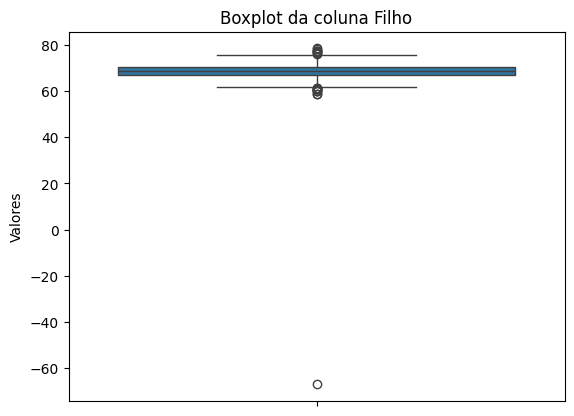

In [ ]:
# Criação do bloxplot da altura da coluna Filho
srn.boxplot(y=df['Filho'])
plt.title('Boxplot da coluna Filho')
plt.ylabel('Valores')
plt.show()

**Tratamento de outliers**

In [ ]:
# Tratamento de outliers das colunas Pai e Filho
df.loc[df['Pai'] < 0, 'Pai'] = mediana_pai
df.loc[df['Filho'] < 0, 'Filho'] = mediana_filho

In [ ]:
# Converte de polegadas para centímetros
df['Pai'] = df['Pai'] * 2.54
df['Filho'] = df['Filho'] * 2.54

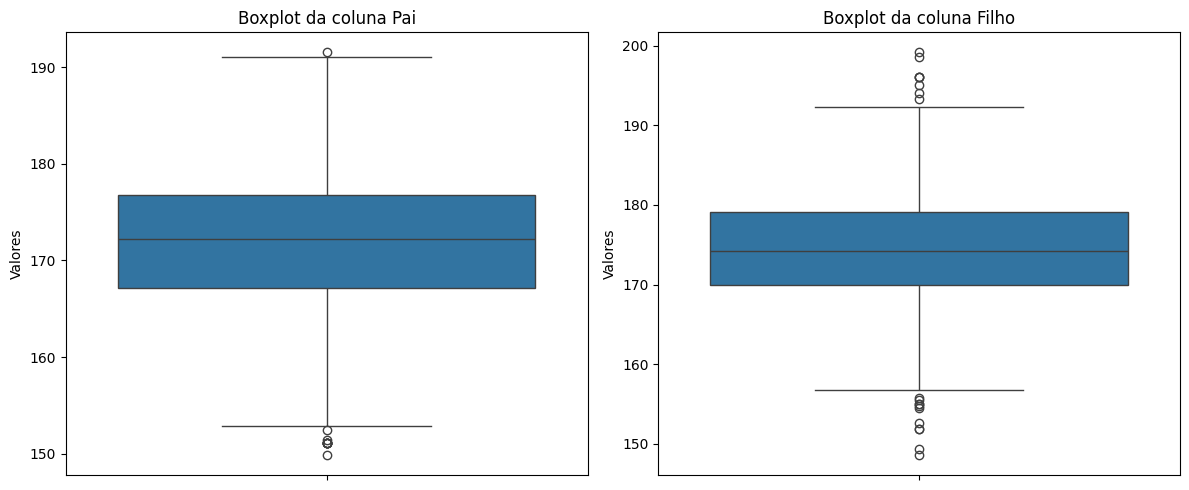

In [ ]:
# Define a área para dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Boxplot da coluna Pai
srn.boxplot(y=df['Pai'], ax=axes[0])
axes[0].set_title('Boxplot da coluna Pai')
axes[0].set_ylabel('Valores')

# Boxplot da coluna Filho
srn.boxplot(y=df['Filho'], ax=axes[1])
axes[1].set_title('Boxplot da coluna Filho')
axes[1].set_ylabel('Valores')

plt.tight_layout()  # Ajusta o espaçamento
plt.show()

# **Divisão em treino e teste**

In [ ]:
# Definição das variaveis idependentes e dependentes
X = df[['Pai']]  # variável independente
y = df['Filho']  # variável dependente

In [ ]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Treinamento do modelo**

In [ ]:
# Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
joblib.dump(modelo, 'modelo_altura.joblib')

['modelo_altura.joblib']

In [ ]:
# Coeficientes do modelo
modelo.coef_, modelo.intercept_

(array([0.50299552]), np.float64(88.14069141604229))

# **Avaliação do Modelo**

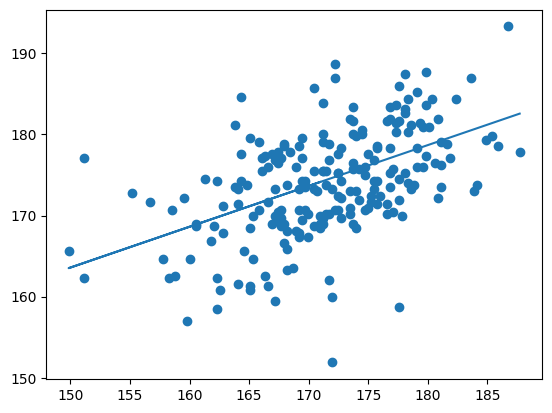

In [ ]:
# Gráfico de dispersão
y_pred = modelo.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

In [ ]:
# Erro absoluto médio / Erro quadrático médio / Coeficiente de Determinação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mae: ", mae)
print('MSE: ', mse)
print('R2: ', r2)

Mae:  4.60676187148389
MSE:  33.07132763568589
R2:  0.25037134195120814


# **Interpretação ou uso do modelo - Interação com usuário/visitante**


In [ ]:
# Solicita ao usuário que insira a altura do pai
altura_pai = float(input("Digite a altura do pai em centímetros: "))

# Cria um DataFrame com o mesmo nome de coluna usado no treino do modelo
entrada = pd.DataFrame({'Pai': [altura_pai]})

# Faz a previsão com o modelo treinado
altura_prevista_filho = modelo.predict(entrada)

# Mostra o resultado formatado
print(f"A altura prevista do filho é: {altura_prevista_filho[0]:.2f} cm")

Digite a altura do pai em centímetros: 187
A altura prevista do filho é: 182.20 cm
